In [1]:
from PIL import Image 
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import os 
import sys

In [2]:
cmap = {
        0: (0, 0, 0),           # background
        1: (255, 0, 0),         # aeroplane
        2: (192, 192, 128),     # bicycle
        3: (128, 64, 128),      # bird
        4: (0, 0, 255),         # boat
        5: (0, 255, 0),         # bottle
        6: (192, 128, 128),     # bus
        7: (64, 64, 128),       # car
        8: (64, 0, 128),        # cat
        9: (64, 64, 0),         # chair
        10: (0, 128, 192),      # cow
        11: (0, 255, 255),      # diningtable
        12: (255, 0, 255),      # dog
        13: (255, 128, 0),      # horse
        14: (0, 102, 102),      # motorbike
        15: (102, 0, 204),      # person
        16: (128, 255, 0),      # potted_plant
        17: (224, 224, 224),    # sheep
        18: (102, 0, 51),       # sofa
        19: (153, 76, 0),       # train
        20: (229, 244, 204),    # tv_monitor
        255: (255, 255, 255)    # void
    }

In [3]:
#SegPath = r"E:\ProgrammingSkills\python\DEEP_LEARNING\DATASETS\PASCALVOC\VOCdevkit\VOC2012\SegmentationClass"
SegPath = r"D:\Code\Dataset\PASCAL-VOOC\VOCtrainval_11-May-2012\VOCdevkit\VOC2012\SegmentationClass"
SegItems = [os.path.join(SegPath, each) for each in os.listdir(SegPath)]

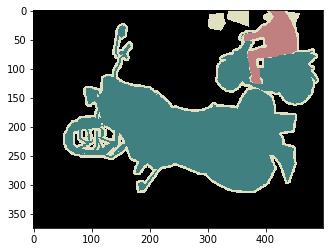

In [4]:
it = 22
plt.imshow(Image.open(SegItems[it]))

In [5]:

#im = cv2.imread(SegItems[it])
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#im[im == np.max(im)] = 0


In [6]:
im = Image.open(SegItems[it]).convert('RGB')
nim = np.array(im)
nim.shape

(375, 500, 3)

In [7]:
c1 = nim[:,:,0]
c2 = nim[:,:,1]
c3 = nim[:,:,2]

In [15]:
print(np.unique(c1))
print(np.unique(c2))
print(np.unique(c3))


[  0  64 192 224]
[  0 128 224]
[  0 128 192]


In [49]:
def color_map(N=256, normalized=False):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            #print(r,g,b, c)
            c = c >> 3
        #print(f'end {i} {np.array([r, g, b])}')
        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap
def color_map_viz():
    labels = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'void']
    nclasses = 21
    row_size = 50
    col_size = 500
    cmap = color_map()
    array = np.empty((row_size*(nclasses+1), col_size, cmap.shape[1]), dtype=cmap.dtype)
    for i in range(nclasses):
        array[i*row_size:i*row_size+row_size, :] = cmap[i]
    array[nclasses*row_size:nclasses*row_size+row_size, :] = cmap[-1]
    print(array)
    plt.imshow(array)
    plt.yticks([row_size*i+row_size/2 for i in range(nclasses+1)], labels)
    plt.xticks([])
    plt.show()
x = color_map()
len(x)

256

In [52]:
x[21]

array([128,  64, 128], dtype=uint8)

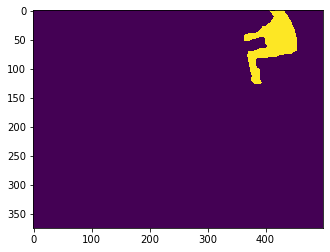

In [43]:
tmp = np.all(nim == x[15], axis=-1).astype('uint8')
#tmp
plt.imshow(tmp)

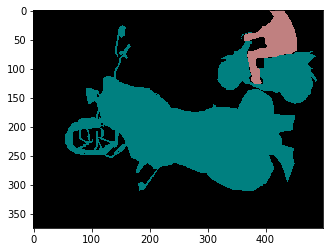

In [35]:
plt.imshow(nim)

In [34]:
gnim[gnim == np.max(gnim)] = 0

In [27]:
np.max(gnim)

38.272